In [1]:
import importlib
import Agenter
import Modell

importlib.reload(Modell)
importlib.reload(Agenter)

from Agenter import SIRAgent
from Modell import SIRModel

import matplotlib.pyplot as plt

N = 100000
width = 140
height = 70
initial_infected = 1
vaccination_rate = 0.5
mortality_rate = 0.0021
timesteps = 100

model = SIRModel(N, width, height, initial_infected, vaccination_rate, mortality_rate)

S_history = []
I_history = []
R_history = []
D_history = []

for t in range(timesteps):
    model.step()
    S_history.append(model.count_status("S"))
    I_history.append(model.count_status("I"))
    R_history.append(model.count_status("R"))
    D_history.append(model.count_status("D"))
    

# Skriv ut resultat efter 1000 steg
print("S:", model.count_status("S"))
print("I:", model.count_status("I"))
print("R:", model.count_status("R"))
print("D:", model.count_status("D"))



S: 17
I: 0
R: 98900
D: 1083


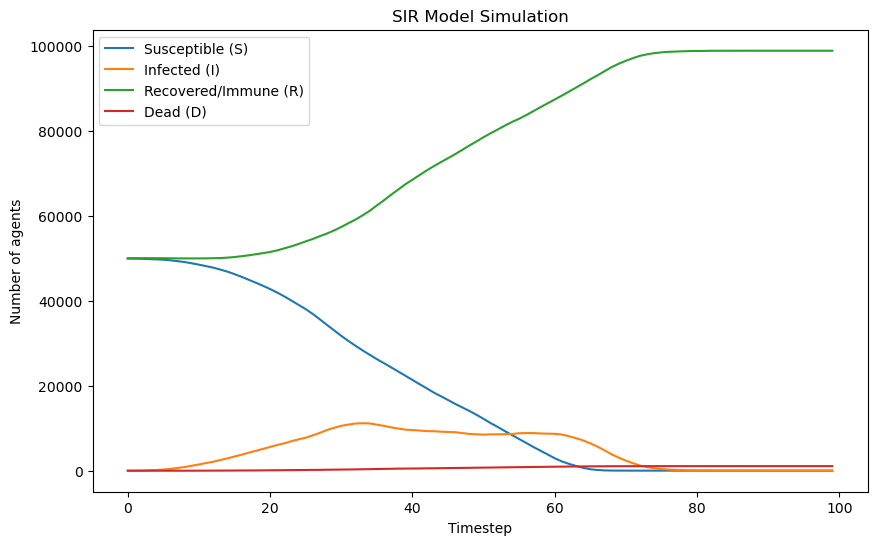

In [2]:

plt.figure(figsize=(10,6))
plt.plot(S_history, label="Susceptible (S)")
plt.plot(I_history, label="Infected (I)")
plt.plot(R_history, label="Recovered/Immune (R)")
plt.plot(D_history, label="Dead (D)")
plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation")
plt.legend()
plt.show()


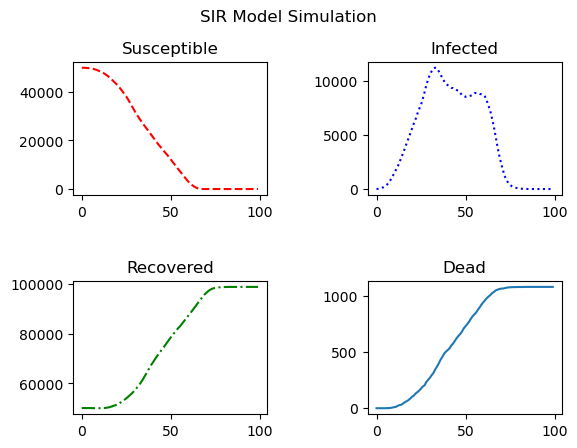

In [3]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_history,'r--', label = "Susceptible")
axs[0, 0].set_title('Susceptible')
axs[0, 1].plot(I_history,'b:', label = "Infected")
axs[0, 1].set_title('Infected')
axs[1, 0].plot(R_history,'g-.', label = "Recovered")
axs[1, 0].set_title('Recovered')
axs[1, 1].plot(D_history, label = "Dead")
axs[1, 1].set_title('Dead')
plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation")
plt.show()

In [4]:
# Skapa dictionary: infector -> antal sekundära infektioner(hur många agenter som den personen har smittat)
secondary = {}
for event in model.infection_log: #går igenom alla smittningar
    inf = event["infector_id"]
    if inf is not None:
        secondary[inf] = secondary.get(inf, 0) + 1 #om man har smittat någon, läggs det till i dictionaryn

# Medelvärdet = Re
Re = sum(secondary.values()) / len(secondary) if secondary else 0 
print("Re =", Re)

Re = 1.9142200011357828


In [5]:
model_df = model.datacollector.get_model_vars_dataframe()
agent_df = model.datacollector.get_agent_vars_dataframe()

In [6]:
agent_df.head()

Agent status Agent position  New Infected
Step AgentID                                          
1    0                  I        (90, 6)             0
     1                  R       (116, 4)             0
     2                  S        (42, 8)             0
     3                  R      (119, 26)             0
     4                  R       (84, 40)             0
     5                  R      (119, 11)             0
     6                  S       (51, 57)             0
     7                  S      (115, 60)             0
     8                  R      (117, 45)             0
     9                  S      (115, 65)             0

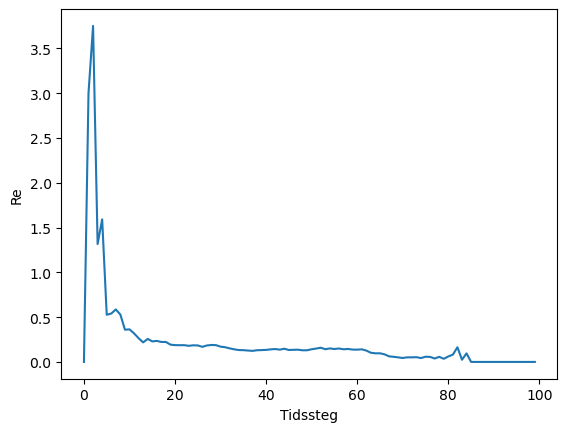

In [7]:
plt.plot(model_df)

plt.xlabel("Tidssteg")
plt.ylabel("Re")
plt.show()